## Loading and comparing EMUstack and S4 data.

#### Load libraries

In [23]:
# libraries
import numpy as np
import xarray as xr

# matplotlib, the python plotting libraries: inline makes the plot appear in the notebook
import matplotlib.pylab as plt
%matplotlib inline 

#### Load data

In [26]:
emu_spectra = xr.load_dataarray('data/EMU_AuNdArraySpectra_circle_px600.0_py400.0_r100.0_h100.0_180222_121902.nc')
emu_lf = xr.load_dataarray('data/EMU_AuNdArrayLF_circle_px600.0_py400.0_r100.0_h100.0_180222_123847.nc')
s4_spectra = xr.load_dataarray('data/S4_AuNdArraySpectra_circle_px600.0_py400.0_r100.0_h100.0_180222_123031.nc')
s4_lf = xr.load_dataarray('data/S4_AuNdArrayLF_circle_px600.0_py400.0_r100.0_h100.0_180222_123816.nc')
px = 600.0
py = 600.0

#### Plot the spectra

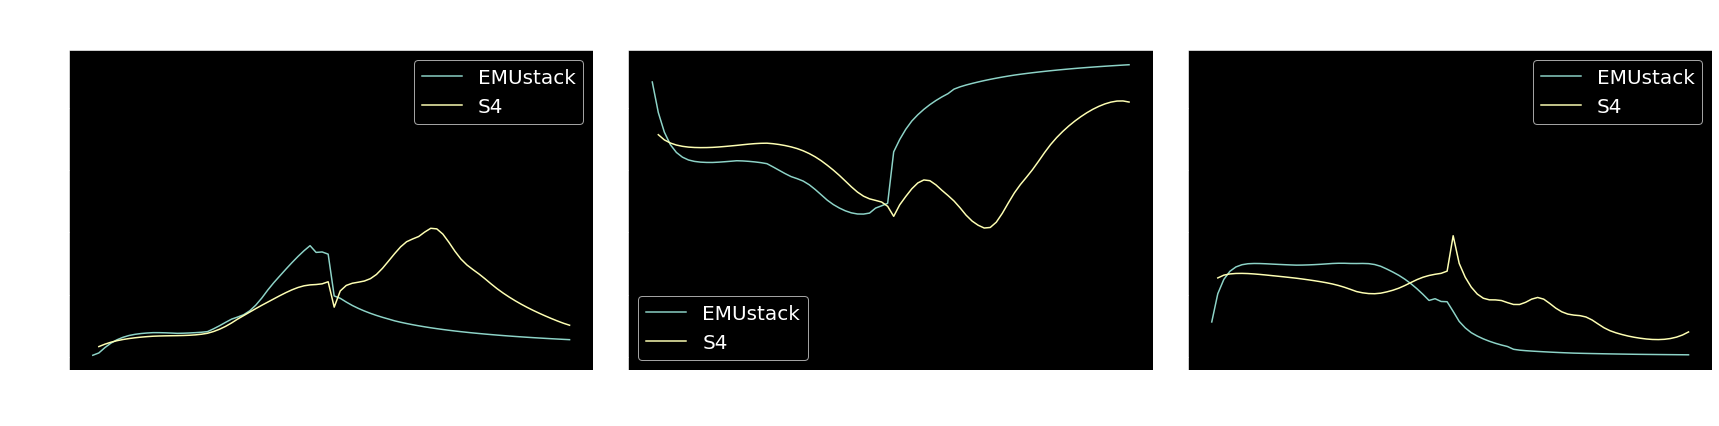

In [27]:
# create a figure with three panels
f_size_title= 32
f_size = 20
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(24, 6))
fig.suptitle('EMUstack vs S4 Spectra Comparison',fontsize = f_size_title)

# ------ plot reflectance ------
ax0.plot(emu_spectra.coords['wavelength'],emu_spectra.sel(spectrum='R'))
ax0.plot(s4_spectra.coords['wavelength'],s4_spectra.sel(spectrum='R'))

# labels
ax0.set_xlabel('Wavelength (nm)',fontsize=f_size)
ax0.set_ylabel('Reflectance',fontsize=f_size)

# legend
ax0.legend(['EMUstack','S4'],fontsize=f_size)

# ticks
ax0.tick_params(labelsize=f_size)

# ------ plot transmittance ------
ax1.plot(emu_spectra.coords['wavelength'],emu_spectra.sel(spectrum='T'))
ax1.plot(s4_spectra.coords['wavelength'],s4_spectra.sel(spectrum='T'))

# labels
ax1.set_xlabel('Wavelength (nm)',fontsize=f_size)
ax1.set_ylabel('Reflectance',fontsize=f_size)

# legend
ax1.legend(['EMUstack','S4'],fontsize=f_size)

# ticks
ax1.tick_params(labelsize=f_size)

# ------ plot absorption ------
ax2.plot(emu_spectra.coords['wavelength'],emu_spectra.sel(spectrum='A'))
ax2.plot(s4_spectra.coords['wavelength'],s4_spectra.sel(spectrum='A'))

# labels
ax2.set_xlabel('Wavelength (nm)',fontsize=f_size)
ax2.set_ylabel('Reflectance',fontsize=f_size)

# legend
ax2.legend(['EMUstack','S4'],fontsize=f_size)

# ticks
ax2.tick_params(labelsize=f_size)

plt.tight_layout()


#### plot the local field

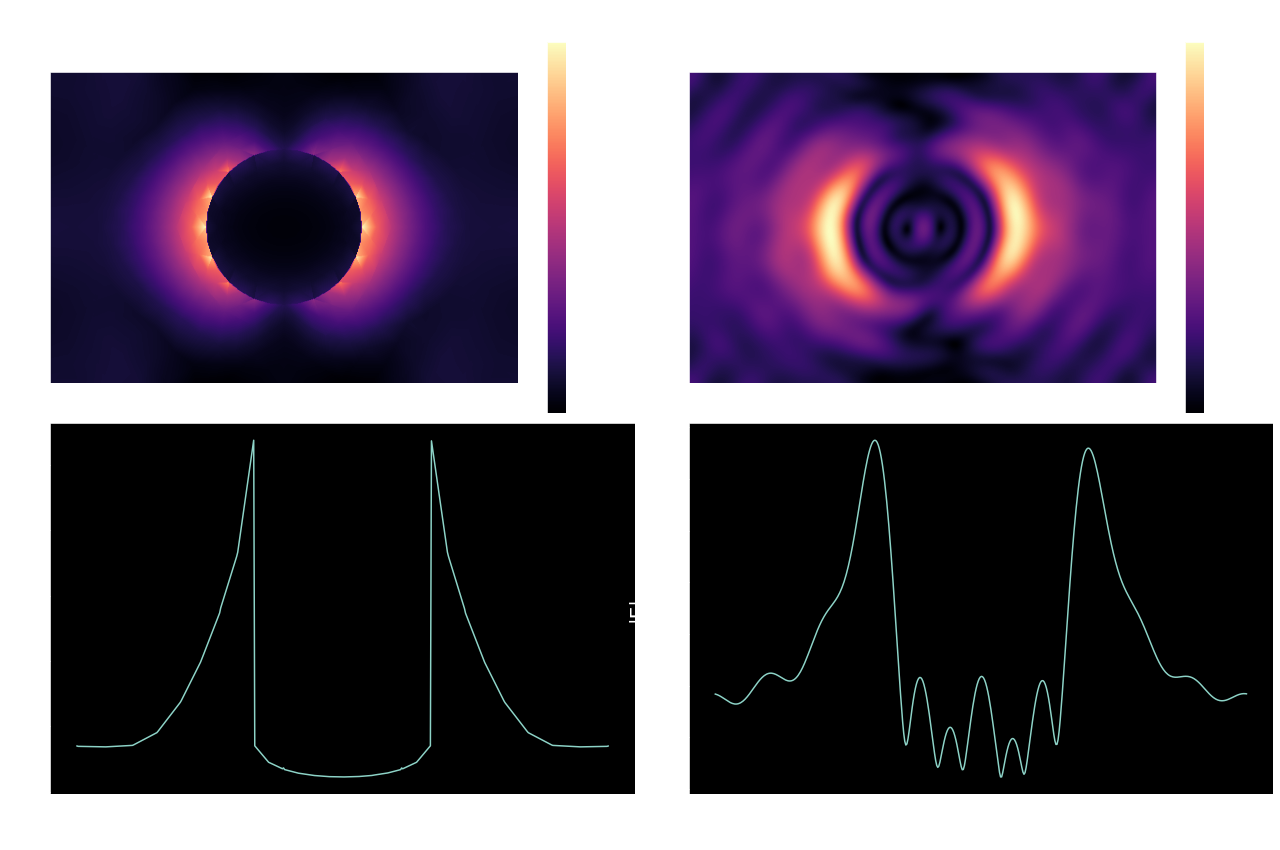

In [29]:
# create a figure with three panels
f_size_title = 32
f_size = 20
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.suptitle("EMUstack vs S4  Local Field Comparison", fontsize=f_size_title)

# ------ EMU lf map ------
im = ax[0,0].imshow(emu_lf, origin='lower',cmap='magma',aspect=py/px)
cbar = fig.colorbar(im,ax=ax[0,0])
cbar.set_label('|E|',fontsize=f_size)
cbar.ax.tick_params(labelsize=f_size) 

# ticks
ax[0,0].set_xticks([])
ax[0,0].set_yticks([])
ax[0,0].tick_params(labelsize=f_size)

# ------ S4 lf map ------
im = ax[0,1].imshow(s4_lf, origin='lower',cmap='magma',aspect=py/px)
cbar = fig.colorbar(im,ax=ax[0,1])
cbar.set_label('|E|',fontsize=f_size)
cbar.ax.tick_params(labelsize=f_size) 

# ticks
ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
ax[0,1].tick_params(labelsize=f_size)


# ------ EMU lf cut ------
ax[1,0].plot(emu_lf.coords['x'],emu_lf.interp(y=200.0))

# labels
ax[1,0].set_xlabel('x',fontsize=f_size)
ax[1,0].set_ylabel('|E|',fontsize=f_size)

# ticks
ax[1,0].tick_params(labelsize=f_size)

# ------ S4 lf cut ------
ax[1,1].plot(s4_lf.coords['x'],s4_lf.interp(y=200.0))

# labels
ax[1,1].set_xlabel('x',fontsize=f_size)
ax[1,1].set_ylabel('|E|',fontsize=f_size)

# ticks
ax[1,1].tick_params(labelsize=f_size)

plt.tight_layout()
